In [2]:
import os
import numpy as np
import sklearn
import sklearn.linear_model
import sklearn.metrics
import sklearn.pipeline
import matplotlib
import matplotlib.pyplot as plt
from confusion_matrix import calc_confusion_matrix_for_probas_and_threshold
from show_images import show_images
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', style='whitegrid', font_scale=1.25)

def calc_mean_binary_cross_entropy_from_probas(ytrue_N, yproba_N):
    return sklearn.metrics.log_loss(ytrue_N, yproba_N, labels=[0, 1]) / np.log(2.0)





In [64]:
A

12000

In [3]:
DATA_DIR = os.path.join('.', 'data_sneaker_vs_sandal')

x_all = np.loadtxt(os.path.join(DATA_DIR, 'x_train.csv'), delimiter=',', skiprows=1)
y_all = np.loadtxt(os.path.join(DATA_DIR, 'y_train.csv'), delimiter=',', skiprows=1)

A = x_all.shape[0]

x_tr = x_all[:8000]
y_tr = y_all[:8000]

x_va = x_all[8000:12000]
y_va = y_all[8000:12000]

In [94]:
# Baseline: raw pixel features, fed into a Logistic Regression classifier
# select iterations
tr_err_list = list()
va_err_list = list()
tr_bce_list = list()
va_bce_list = list()
C = 10
for i in range(1, 51):
    lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', C=C, max_iter=i).fit(x_tr, y_tr)
    yproba_tr = lr.predict_proba(x_tr)[:, 1]
    yproba_va = lr.predict_proba(x_va)[:, 1]

    tr_bce = calc_mean_binary_cross_entropy_from_probas(y_tr, yproba_tr)
    va_bce = calc_mean_binary_cross_entropy_from_probas(y_va, yproba_va)
    tr_bce_list.append(tr_bce)
    va_bce_list.append(va_bce)

    tr_error = sklearn.metrics.zero_one_loss(y_tr, yproba_tr >= 0.5)
    va_error = sklearn.metrics.zero_one_loss(y_va, yproba_va >= 0.5)
    tr_err_list.append(tr_error)
    va_err_list.append(va_error)



/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

(0.0, 1.0)

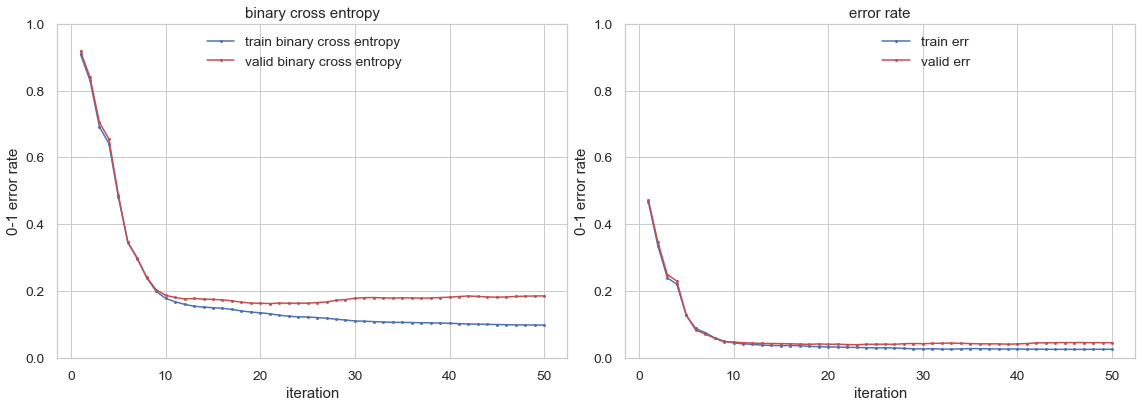

In [95]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,figsize=(16, 5.5))
fig.tight_layout()
cur_ax = ax_grid[0]
plt.sca(cur_ax)
cur_ax.set_title('binary cross entropy')
plt.plot(range(1, 51), tr_bce_list, 'b.-', label='train binary cross entropy')
plt.plot(range(1, 51), va_bce_list, 'r.-', label='valid binary cross entropy')
plt.ylabel('0-1 error rate')
plt.xlabel("iteration")
plt.legend(bbox_to_anchor=(0.7, 1))
plt.ylim([0, 1])

cur_ax = ax_grid[1]
plt.sca(cur_ax)
cur_ax.set_title('error rate')
plt.plot(range(1, 51), tr_err_list, 'b.-', label='train err')
plt.plot(range(1, 51), va_err_list, 'r.-', label='valid err')
plt.ylabel('0-1 error rate')
plt.xlabel("iteration")
plt.legend(bbox_to_anchor=(0.7, 1))
plt.ylim([0, 1])

In [68]:
#select C
tr_err_list = list()
va_err_list = list()
tr_bce_list = list()
va_bce_list = list()
i = 1000
C_grid = np.logspace(-9, 6, 31)
for C in C_grid:
    lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', C=C, max_iter=i).fit(x_tr, y_tr)
    yproba_tr = lr.predict_proba(x_tr)[:, 1]
    yproba_va = lr.predict_proba(x_va)[:, 1]

    tr_bce = calc_mean_binary_cross_entropy_from_probas(y_tr, yproba_tr)
    va_bce = calc_mean_binary_cross_entropy_from_probas(y_va, yproba_va)
    tr_bce_list.append(tr_bce)
    va_bce_list.append(va_bce)

    tr_error = sklearn.metrics.zero_one_loss(y_tr, yproba_tr >= 0.5)
    va_error = sklearn.metrics.zero_one_loss(y_va, yproba_va >= 0.5)
    tr_err_list.append(tr_error)
    va_err_list.append(va_error)

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

(0.0, 1.0)

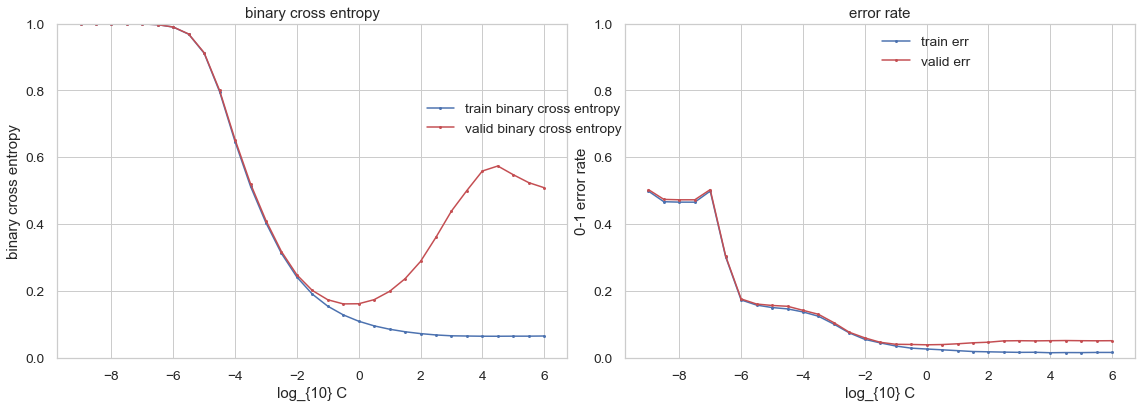

In [69]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,figsize=(16, 5.5))
fig.tight_layout()
cur_ax = ax_grid[0]
plt.sca(cur_ax)
cur_ax.set_title('binary cross entropy')
plt.plot(np.log10(C_grid), tr_bce_list, 'b.-', label='train binary cross entropy')
plt.plot(np.log10(C_grid), va_bce_list, 'r.-', label='valid binary cross entropy')
plt.ylabel('binary cross entropy')
plt.xlabel("log_{10} C")
plt.legend(bbox_to_anchor=(0.7, 0.8))
plt.ylim([0, 1])

cur_ax = ax_grid[1]
plt.sca(cur_ax)
cur_ax.set_title('error rate')
plt.plot(np.log10(C_grid), tr_err_list, 'b.-', label='train err')
plt.plot(np.log10(C_grid), va_err_list, 'r.-', label='valid err')
plt.ylabel('0-1 error rate')
plt.xlabel("log_{10} C")
plt.legend(bbox_to_anchor=(0.7, 1))
plt.ylim([0, 1])

select C = 1

In [90]:
#baseline
tr_err_list = list()
va_err_list = list()
tr_bce_list = list()
va_bce_list = list()

i = 40
C = 10

lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', C=C, max_iter=i).fit(x_tr, y_tr)
yproba_tr = lr.predict_proba(x_tr)[:, 1]
yproba_va = lr.predict_proba(x_va)[:, 1]

tr_bce = calc_mean_binary_cross_entropy_from_probas(y_tr, yproba_tr)
va_bce = calc_mean_binary_cross_entropy_from_probas(y_va, yproba_va)
tr_bce_list.append(tr_bce)
va_bce_list.append(va_bce)

tr_error = sklearn.metrics.zero_one_loss(y_tr, yproba_tr >= 0.5)
va_error = sklearn.metrics.zero_one_loss(y_va, yproba_va >= 0.5)
tr_err_list.append(tr_error)
va_err_list.append(va_error)

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
print(calc_confusion_matrix_for_probas_and_threshold(y_va, yproba_va, 0.5))

Predicted     0     1
True                 
0          1902    86
1            91  1921


In [21]:
len(false_negative)

94

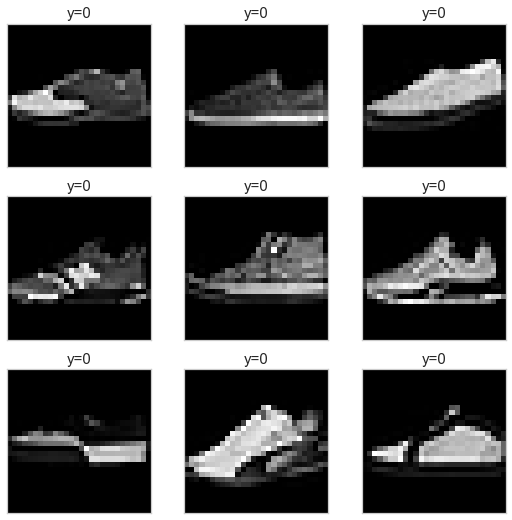

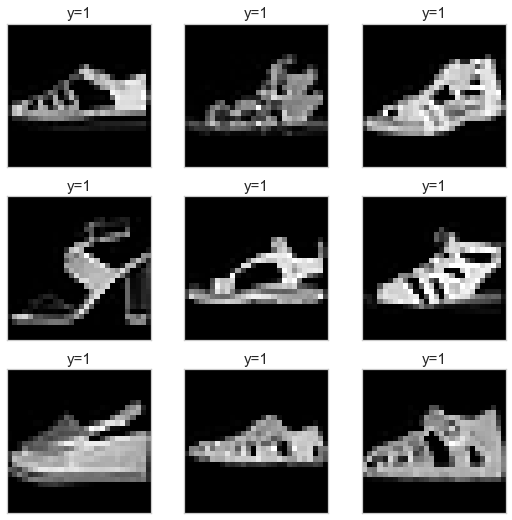

In [18]:
false_positive = []
false_negative = []
for i in range(4000):
    p = yproba_va[i]
    p = p>0.5
    if p == 1 and p != y_va[i]:
        false_positive.append(i)
    if p == 0 and p != y_va[i]:
        false_negative.append(i)

    
show_images(x_va,y_va,false_positive[0:9])
show_images(x_va,y_va,false_negative[0:9])

In [51]:
#1) A feature transform of your own design, fed into a Logistic Regression classifier
tr_err_list = list()
va_err_list = list()
tr_bce_list = list()
va_bce_list = list()

pipeline = sklearn.pipeline.Pipeline([
    ("step1", sklearn.preprocessing.PolynomialFeatures(2)),
    ("step2", sklearn.linear_model.LogisticRegression(solver='lbfgs', C=1, max_iter=20)),
    ])
pipeline.fit(x_tr, y_tr)
yproba_tr = pipeline.predict_proba(x_tr)[:, 1]
yproba_va = pipeline.predict_proba(x_va)[:, 1]

tr_bce = calc_mean_binary_cross_entropy_from_probas(y_tr, yproba_tr)
va_bce = calc_mean_binary_cross_entropy_from_probas(y_va, yproba_va)
tr_bce_list.append(tr_bce)
va_bce_list.append(va_bce)

tr_error = sklearn.metrics.zero_one_loss(y_tr, yproba_tr >= 0.5)
va_error = sklearn.metrics.zero_one_loss(y_va, yproba_va >= 0.5)
tr_err_list.append(tr_error)
va_err_list.append(va_error)

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
print(calc_confusion_matrix_for_probas_and_threshold(y_va, yproba_va, 0.5))

Predicted     0     1
True                 
0          1962    54
1            72  1912


In [53]:
#1) A feature transform of your own design, fed into a Logistic Regression classifier
tr_err_list = list()
va_err_list = list()
tr_bce_list = list()
va_bce_list = list()

pipeline = sklearn.pipeline.Pipeline([
    ("step1", sklearn.preprocessing.PolynomialFeatures(2)),
    ("step2", sklearn.linear_model.LogisticRegression(solver='lbfgs', C=1, max_iter=30)),
    ])
pipeline.fit(x_tr, y_tr)
yproba_tr = pipeline.predict_proba(x_tr)[:, 1]
yproba_va = pipeline.predict_proba(x_va)[:, 1]

tr_bce = calc_mean_binary_cross_entropy_from_probas(y_tr, yproba_tr)
va_bce = calc_mean_binary_cross_entropy_from_probas(y_va, yproba_va)
tr_bce_list.append(tr_bce)
va_bce_list.append(va_bce)

tr_error = sklearn.metrics.zero_one_loss(y_tr, yproba_tr >= 0.5)
va_error = sklearn.metrics.zero_one_loss(y_va, yproba_va >= 0.5)
tr_err_list.append(tr_error)
va_err_list.append(va_error)

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
print(calc_confusion_matrix_for_probas_and_threshold(y_va, yproba_va, 0.5))

Predicted     0     1
True                 
0          1975    41
1            68  1916


In [ ]:
tr_err_list = list()
va_err_list = list()
tr_bce_list = list()
va_bce_list = list()

pipeline = sklearn.pipeline.Pipeline([
    ("step1", sklearn.preprocessing.PolynomialFeatures(2)),
    ("step2", sklearn.linear_model.LogisticRegression(solver='lbfgs', C=1, max_iter=40)),
    ])
pipeline.fit(x_tr, y_tr)
yproba_tr = pipeline.predict_proba(x_tr)[:, 1]
yproba_va = pipeline.predict_proba(x_va)[:, 1]

tr_bce = calc_mean_binary_cross_entropy_from_probas(y_tr, yproba_tr)
va_bce = calc_mean_binary_cross_entropy_from_probas(y_va, yproba_va)
tr_bce_list.append(tr_bce)
va_bce_list.append(va_bce)

tr_error = sklearn.metrics.zero_one_loss(y_tr, yproba_tr >= 0.5)
va_error = sklearn.metrics.zero_one_loss(y_va, yproba_va >= 0.5)
tr_err_list.append(tr_error)
va_err_list.append(va_error)

In [ ]:
print(calc_confusion_matrix_for_probas_and_threshold(y_va, yproba_va, 0.5))

In [58]:

tr_err_list = list()
va_err_list = list()
tr_bce_list = list()
va_bce_list = list()
x_tr_short = x_tr[:1000]
y_tr_short = y_tr[:1000]
for i in range(40, 100, 10):
    pipeline = sklearn.pipeline.Pipeline([
        ("step1", sklearn.preprocessing.PolynomialFeatures(2)),
        ("step2", sklearn.linear_model.LogisticRegression(solver='lbfgs', C=1, max_iter=i)),
        ])
    pipeline.fit(x_tr_short, y_tr_short)
    yproba_tr = pipeline.predict_proba(x_tr)[:, 1]
    yproba_va = pipeline.predict_proba(x_va)[:, 1]

    tr_bce = calc_mean_binary_cross_entropy_from_probas(y_tr, yproba_tr)
    va_bce = calc_mean_binary_cross_entropy_from_probas(y_va, yproba_va)
    tr_bce_list.append(tr_bce)
    va_bce_list.append(va_bce)

    tr_error = sklearn.metrics.zero_one_loss(y_tr, yproba_tr >= 0.5)
    va_error = sklearn.metrics.zero_one_loss(y_va, yproba_va >= 0.5)
    tr_err_list.append(tr_error)
    va_err_list.append(va_error)

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

(0.0, 1.0)

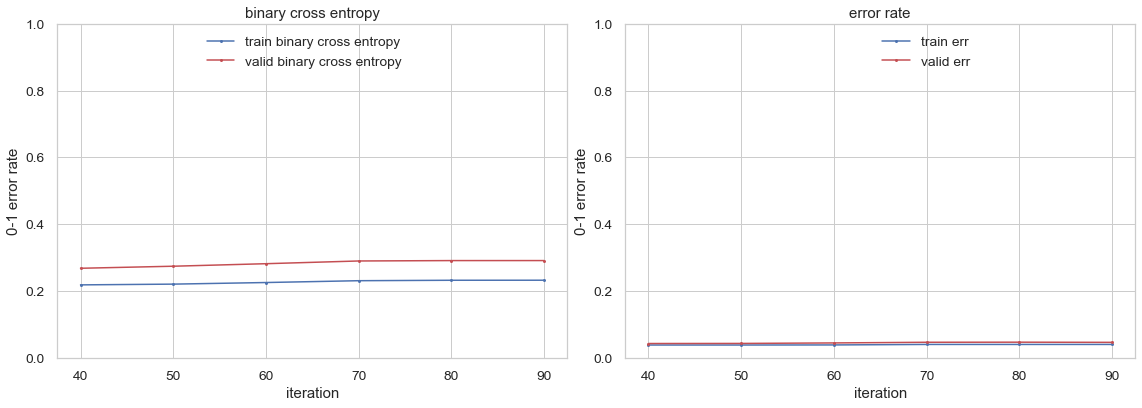

In [60]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,figsize=(16, 5.5))
fig.tight_layout()
cur_ax = ax_grid[0]
plt.sca(cur_ax)
cur_ax.set_title('binary cross entropy')
plt.plot(range(40, 100, 10), tr_bce_list, 'b.-', label='train binary cross entropy')
plt.plot(range(40, 100, 10), va_bce_list, 'r.-', label='valid binary cross entropy')
plt.ylabel('0-1 error rate')
plt.xlabel("iteration")
plt.legend(bbox_to_anchor=(0.7, 1))
plt.ylim([0, 1])

cur_ax = ax_grid[1]
plt.sca(cur_ax)
cur_ax.set_title('error rate')
plt.plot(range(40, 100, 10), tr_err_list, 'b.-', label='train err')
plt.plot(range(40, 100, 10), va_err_list, 'r.-', label='valid err')
plt.ylabel('0-1 error rate')
plt.xlabel("iteration")
plt.legend(bbox_to_anchor=(0.7, 1))
plt.ylim([0, 1])

In [61]:
print(calc_confusion_matrix_for_probas_and_threshold(y_va, yproba_va, 0.5))

Predicted     0     1
True                 
0          1956    60
1           125  1859


In [4]:
#2) Another feature transform of your own design, fed into a Logistic Regression classifier or some other classifier (e.g. KNeighborsClassifier)
# Using MLP
from sklearn.neural_network import MLPClassifier
layer_sizes = [784]
max_iter_per_run = 3000
pipeline = sklearn.pipeline.Pipeline([
    ("step1", sklearn.preprocessing.MinMaxScaler()),
    ("step2", MLPClassifier(
            hidden_layer_sizes=layer_sizes,
            activation='relu',
            alpha=0.0001,
            tol=1e-5,
            n_iter_no_change=50,
            max_iter=max_iter_per_run,
            solver='sgd',
            batch_size=500,
            learning_rate='adaptive', learning_rate_init=0.2, momentum=0.0,
            )),
    ])
pipeline.fit(x_tr,y_tr)
yproba_tr = pipeline.predict_proba(x_tr)[:,1]
yproba_va = pipeline.predict_proba(x_va)[:,1]
tr_log_loss = sklearn.metrics.log_loss(y_tr, yproba_tr)/np.log(2)
va_log_loss = sklearn.metrics.log_loss(y_va, yproba_va)/np.log(2)
print(calc_confusion_matrix_for_probas_and_threshold(y_va, yproba_va, 0.5))

Predicted     0     1
True                 
0          1954    34
1            42  1970


In [7]:
layer_sizes = [784]
max_iter_per_run = 4000
from sklearn.neural_network import MLPClassifier
pipeline = sklearn.pipeline.Pipeline([
    ("step1", sklearn.preprocessing.MinMaxScaler()),
    ("step2", MLPClassifier(
            hidden_layer_sizes=layer_sizes,
            activation='relu',
            alpha=0.0001,
            tol=1e-5,
            n_iter_no_change=50,
            max_iter=max_iter_per_run,
            solver='sgd',
            batch_size=100,
            learning_rate='adaptive', learning_rate_init=0.2, momentum=0.0,
            )),
    ])
pipeline.fit(x_tr,y_tr)
yproba_tr = pipeline.predict_proba(x_tr)[:,1]
yproba_va = pipeline.predict_proba(x_va)[:,1]
tr_log_loss = sklearn.metrics.log_loss(y_tr, yproba_tr)/np.log(2)
va_log_loss = sklearn.metrics.log_loss(y_va, yproba_va)/np.log(2)


Predicted     0     1
True                 
0          1958    30
1            44  1968


In [32]:
print(calc_confusion_matrix_for_probas_and_threshold(y_va, yproba_va, 0.5))

Predicted     0     1
True                 
0          1958    30
1            44  1968


In [10]:
x_te = np.loadtxt(os.path.join(DATA_DIR, 'x_test.csv'), delimiter=',', skiprows=1)


In [11]:
yproba_te = pipeline.predict_proba(x_te)[:,1]
np.savetxt('yproba1_test2.txt', yproba_te, delimiter='\n')

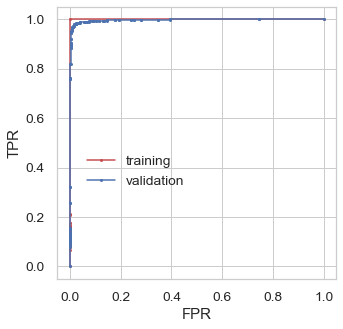

In [37]:
tr_fpr, tr_tpr, ignore_this = sklearn.metrics.roc_curve(y_tr, yproba_tr)
va_fpr, va_tpr, ignore_this2 = sklearn.metrics.roc_curve(y_va, yproba_va)
plt.figure(figsize=(5,5));
plt.plot(tr_fpr, tr_tpr, 'r.-', label='training');
plt.plot(va_fpr, va_tpr, 'b.-', label='validation');

plt.xlabel('FPR');
plt.ylabel('TPR');
plt.legend(bbox_to_anchor=(0.5, 0.5));